In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = r"C:\Users\david\anaconda3\datasets\BeerDataScienceProject.tar.bz2"
df = pd.read_csv(file_path, compression="bz2")

## Exloratory Analysis

In [7]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [8]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [9]:
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

The dataset consists of 528,870 rows and 13 columns. It includes two ID columns (beer ID and brewer ID), beer attributes like ABV, name, and style. The majority of the data pertains to beer reviews, with columns covering specific attributes (aroma, taste, palette, appearance), reviewer profiles, overall grades, review text, and timestamps. 

The reviews appear to be float values within a 1 to 5 range. Further validation will be conducted in the next cell.

In [10]:
#Closer look at reviews
df[["review_appearance", "review_palette", "review_overall", "review_taste", "review_aroma"]].describe()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.864522,3.758926,3.833197,3.765993,3.817350
std,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


Looking at the output in the previous cell, we see that different columns have different non-null counts. The simplest approach is to drop any row that has a null value by assuming that, for that record, we have error in collecting the data - the set is mostly complete so this shouldn't be a problem.

In [12]:
# Dropping nulls
df = df.dropna()

In [13]:
df.shape

(508358, 13)

Users can leave more than one review on the same beer.  For the purpose of this analysis we would like one review per beer/user combination, so we will keep only the highest review if there are duplicates.

In [14]:
df = df.sort_values(by="review_overall", ascending=False).drop_duplicates(subset=["review_profileName", "beer_beerId"], keep="first")

In [15]:
df.shape

(503700, 13)

### Rank the breweries producing the strongest beers (determined by ABV content)

In [39]:
df_strongest = df.groupby(by=["beer_brewerId"])["beer_ABV"].mean().reset_index().sort_values(by="beer_ABV", ascending=False)
# renaming the column for readability
df_strongest = df_strongest.rename(columns={"beer_ABV": "mean_brewer_beerABV"})

In [40]:
# rank the breweries, and output the top 5
df_strongest["rank"] = df_strongest["mean_brewer_beerABV"].rank(method="dense", ascending=False)
df_strongest[df_strongest["rank"] <= 5]

,beer_brewerId,mean_brewer_beerABV,rank
784,6513,19.228824,1.0
175,736,13.750000,2.0
1644,24215,12.466667,3.0
9,36,12.445860,4.0
881,8540,11.750000,5.0


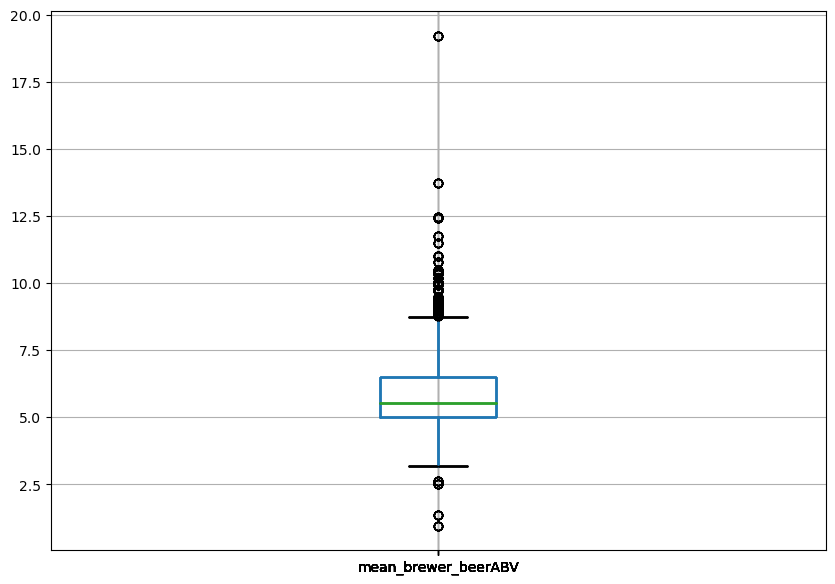

In [45]:
# Plot the distribution of the average ABV
_ = df_strongest.boxplot(column="mean_brewer_beerABV", figsize=(10, 7))

# Display the plot
plt.show()


### Which year did beers have the highest ratings?

In [6]:
# extract year from the review timestamp
df["review_year"] = pd.to_datetime(df["review_time"], unit="s").dt.year

In [8]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


Once we have the year, we can aggregate by it and calculate the highest ratings.

As a measure of the "highest ratings in a year" we will take the average overall review for that particular year.

In [9]:
reviews_per_year = df.groupby(by="review_year").size().to_frame("reviews_per_year").reset_index()
# print a sample
reviews_per_year.sample(n=5, random_state=42)

,review_year,reviews_per_year
9,2007,46514
11,2009,83578
0,1998,23
13,2011,110836
5,2003,18187


In [10]:
df_reviews = df.groupby(by="review_year")["review_overall"].mean().reset_index().sort_values(by="review_overall",
                                                                                        ascending=False)
# renaming the column for readability
df_reviews = df_reviews.rename(columns={
    "review_overall": "yearly_mean_overall_review"
})
df_reviews.sample(n=5, random_state=42)

,review_year,yearly_mean_overall_review
13,2011,3.828093
4,2002,3.798905
2,2000,4.181818
6,2004,3.794630
11,2009,3.864390


In [17]:
# merging the two previous DataFrames
df_reviews = df_reviews.merge(right=reviews_per_year, how="inner", on="review_year")
df_reviews.sample(n=5, random_state=42)

,review_year,yearly_mean_overall_review,reviews_per_year_x,reviews_per_year_y,reviews_per_year_x,reviews_per_year_y,reviews_per_year
9,2011,3.828093,110836,110836,110836,110836,110836
11,2002,3.798905,7581,7581,7581,7581,7581
0,2000,4.181818,33,33,33,33,33
13,2004,3.794630,22905,22905,22905,22905,22905
5,2009,3.864390,83578,83578,83578,83578,83578


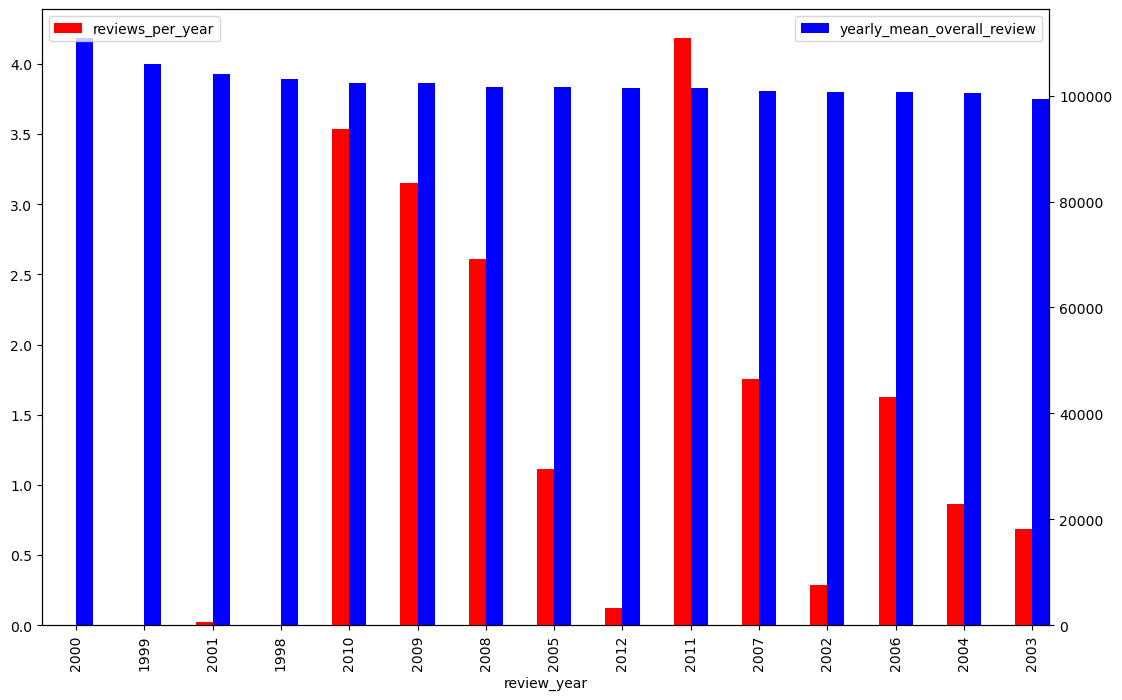

In [18]:
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(13, 8))
ax1 = figure.add_subplot(111)
ax2 = ax1.twinx()
df_reviews.plot(x="review_year", y="yearly_mean_overall_review", kind="bar", color="blue", ax=ax1, width=0.25, position=0)
df_reviews.plot(x="review_year", y="reviews_per_year", kind="bar", color="red", ax=ax2, width=0.25, position=1)
plt.legend(loc="upper left")
plt.show()


The year 2000 saw the highest overall beer reviews. However, the number of reviews for the top four years is very small. So much so that we'd be better off ignoring them and marking them as 'not having enough data to draw a conclusion.' Therefore, the final answer to the question of which year had the best-rated beers would be 2010. It's also worth noting that 2011 had the highest number of reviews while still maintaining a high average review grade.

### Based on user ratings, which factor is most important among taste, aroma, appearance, and palette?

To determine the importance between the factors listed, and the users' (overall) ratings, we can calculate the correlation coefficient between them and use it as an importance measure.

In [20]:
# there are multiple reviews per beer so we aggregate the reviews
df_factors = df.groupby(by="beer_beerId")[[
    "review_taste",
    "review_aroma",
    "review_appearance",
    "review_palette",
    "review_overall"
]].mean()

In [21]:
df_factors.corr()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.821956,0.659598,0.736896,0.809601
review_aroma,0.821956,1.000000,0.637400,0.813106,0.873737
review_appearance,0.659598,0.637400,1.000000,0.647649,0.614839
review_palette,0.736896,0.813106,0.647649,1.000000,0.747198
review_overall,0.809601,0.873737,0.614839,0.747198,1.000000


According to the provided correlation matrix, the aroma stands out as the most crucial factor for beer reviews, with a strong correlation of 0.88 with the overall review grade. Taste and palette closely follow, with significant correlations as well. On the other hand, appearance, while the least important among these factors, still exhibits a notable correlation coefficient.

In [22]:
from seaborn import heatmap

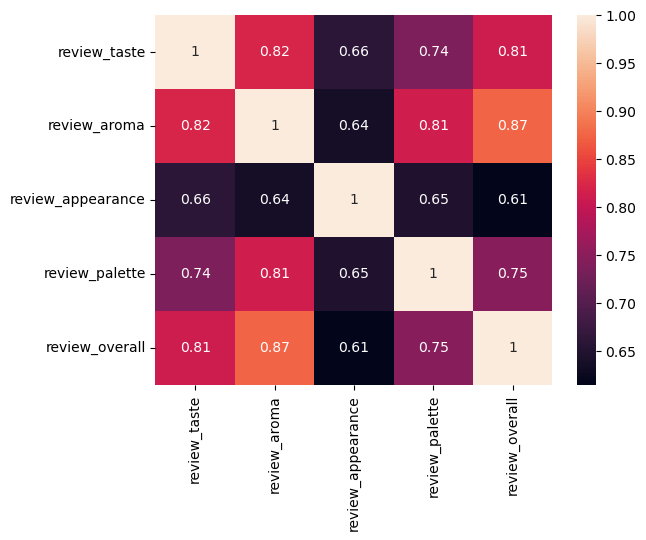

In [23]:
_ = heatmap(data=df_factors.corr(), annot=True)

### If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

If I were to recommend beers to my friends, based on this data set, I would only recommend them the best of the best, so lets find the ones that are reviewed most often, and most highly.

In [24]:
df_best = df.groupby(by="beer_beerId")["review_overall"].agg(["count", "mean"])
# orenaming for readability
df_best = df_best.rename(columns={
    "count": "num_reviews",
    "mean": "mean_overall_review"
})

In [25]:
# Sort the beers by their average grade
df_best.sort_values(by="mean_overall_review", ascending=False, inplace=True)

In [26]:
df_best.head()

,num_reviews,mean_overall_review
beer_beerId,,
39026,1,5.0
50133,1,5.0
61353,1,5.0
8627,1,5.0
73730,1,5.0


While these beers have perfect scores, they have only been reviewed by a single user.  We want to recommend beers which are accecpter by a larger amount of people.

Let's look at the distribution of the number of reviews and find a suitable cut-off point.

In [27]:
df_best.describe()

,num_reviews,mean_overall_review
count,20200.000000,20200.000000
mean,26.181683,3.651862
std,123.799950,0.631129
min,1.000000,1.000000
25%,1.000000,3.399774
50%,2.000000,3.750000
75%,7.000000,4.000000
max,3000.000000,5.000000


The distribution seems rather skewed, with over 50% of beers having less than 3 reviews.

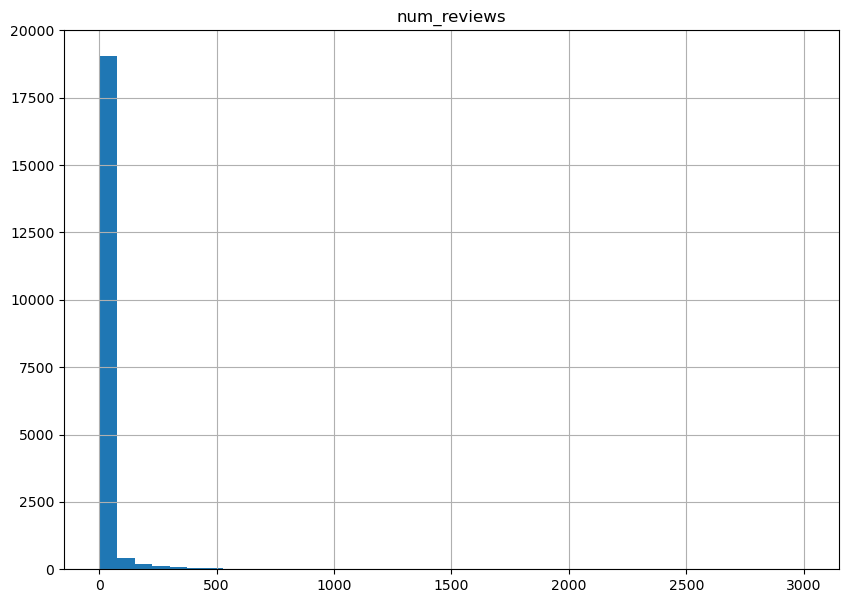

In [28]:
_ = df_best.hist(column="num_reviews", bins=40, figsize=(10, 7))


As expected, a large spike can be seen in the lowest bucket.  Since our friends only deserve the best, we will use 200 reviews as the cut-off point.

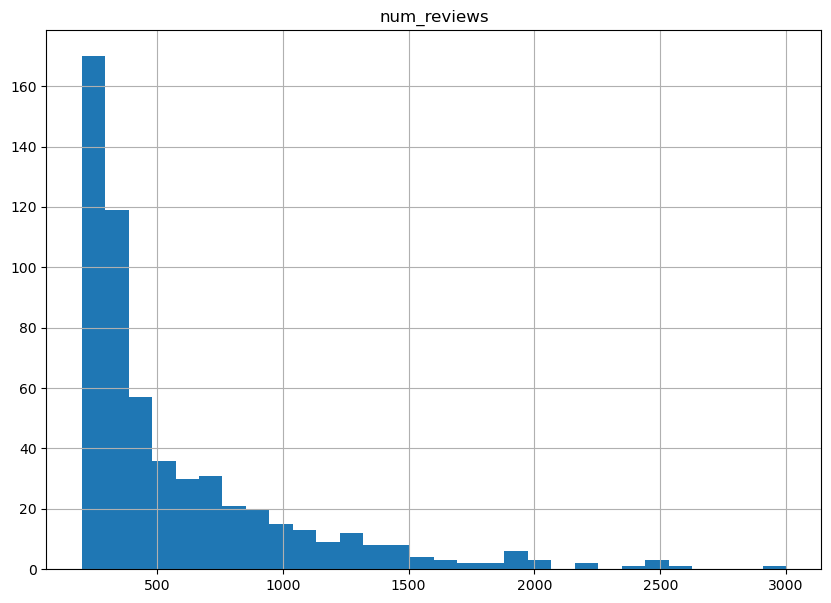

In [29]:
# Plotting the distribution again
_ = df_best[df_best["num_reviews"] > 200].hist(column="num_reviews", bins=30, figsize=(10, 7))

In [30]:
df_best[df_best["num_reviews"] > 200].head()

,num_reviews,mean_overall_review
beer_beerId,,
56082,252,4.630952
16814,469,4.625800
47658,637,4.591052
6368,662,4.488671
2899,287,4.432056


In [31]:
# More info on our top-rated beers
# Hope our friends like American Doubles
df[(df["beer_beerId"] == 56082) | (df["beer_beerId"] == 47658) | (df["beer_beerId"] == 16814)].drop_duplicates(
    subset="beer_beerId")

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
16176,10.6,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,4.5,4.5,4.5,5.0,ColForbinBC,4.5,750mL bottle poured into a snifter Pours an in...,1321818225,2011
334853,8.0,56082,14064,Citra DIPA,American Double / Imperial IPA,4.0,4.5,4.5,4.0,IdrinkGas,4.5,Poured from a bomber into a Lost Abbey tulip. ...,1314513820,2011
378400,8.0,16814,27039,Heady Topper,American Double / Imperial IPA,4.5,5.0,4.5,4.5,onefmatt,4.5,"A+ in my book, just a fantastic and well round...",1321078004,2011
